# Sprint5

# コーディング
## データセット確認

In [1]:
import numpy as np

X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

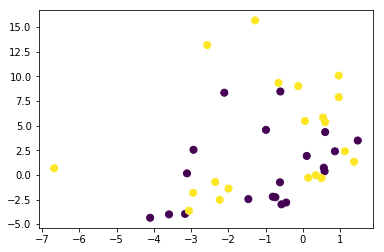

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1], s=50, c=y, marker='o')

## コーディング

In [3]:
import numpy as np

class ScratchDecesionTreeClassifier:
    def __init__(self):
        # 学習後しきい値
        self.threshold = 0
         # 学習後クラスラベル
        self.y_IB = 0
        self.y_IC = 0
        # 学習後特徴量
        self.row_X = 0
    
    def fit(self, X, y):
        # 学習
        # 情報量利得保存
        info_gain = np.zeros(X.shape)
        
        # ラベル保存
        info_label_IB = np.zeros(X.shape)
        info_label_IC = np.zeros(X.shape)
        
        # ラベル名取得 
        label = np.unique(y)
        
        # IA(一層目の情報利得の計算)
        # IAジニ不純度
        IA = 1 - (len(y[y==label[0]])/len(y))**2 - (len(y[y==label[1]])/len(y))**2
    
        # 特徴量ごとに探索
        for x_row in range(X.shape[1]):
            for i in range(len(X)):    
                # Xの要素を閾値としてインデックスを取得
                IB_X_index = np.where(X[X[:,x_row] > X[i,x_row]][:, x_row])
                IC_X_index = np.where(X[X[:,x_row] <= X[i,x_row]][:, x_row])
           
                # IB IC(二層目の計算)
                # 閾値ごとのyを取得
                IB_y = y[IB_X_index]
                IC_y = y[IC_X_index]
                # IB IC ジニ係数
                # 各ラベルがゼロの時はジニ係数を０にする
                if(len(IB_y) == 0):
                    IB = 0
                else:
                    # IBジニ係数を計算
                    IB = (1 - (len(IB_y[IB_y==label[0]])/len(IB_y))**2 - (len(IB_y[IB_y==label[1]])/len(IB_y))**2) * (len(IB_y)/len(y))
                    # ラベルの割合が多い方を採用
                    if(len(IB_y[IB_y==label[1]]) > len(IB_y[IB_y==label[0]])):
                        label_IB = label[1]
                    else:
                        label_IB = label[0]
                if(len(IC_y) == 0):
                    IC = 0
                else:
                    # ICジニ係数を計算
                    IC = (1 - (len(IC_y[IC_y==label[0]])/len(IC_y))**2 - (len(IC_y[IC_y==label[1]])/len(IC_y))**2) * (len(IC_y)/len(y))
                    # ラベルの割合が多い方を採用
                    if( len(IC_y[IC_y==label[1]])/len(y) > len(IC_y[IC_y==label[0]])/len(y)):
                        label_IC = label[1]
                    else:
                        label_IC = label[0]
    
                # 0のときのラベル
                if(IB == 0):
                    # ラベルの割合が多い方を採用
                    if( len(IC_y[IC_y==label[1]]) > len(IC_y[IC_y==label[0]])):
                        label_IC = label[1]
                        label_IB = label[0]
                    else:
                        label_IC = label[0]
                        label_IB = label[1]
                if(IC == 0):
                    # ラベルの割合が多い方を採用
                    if( len(IC_y[IC_y==label[1]]) > len(IC_y[IC_y==label[0]])):
                        label_IB = label[1]
                        label_IC = label[0]
                    else:
                        label_IB = label[0]
                        label_IC = label[1]
    
                # 情報利得
                info_gain[i, x_row] = IA - IB - IC
                # ラベル
                info_label_IB[i, x_row] = label_IB
                info_label_IC[i, x_row] = label_IC

        if (info_gain[:,0].max() >= info_gain[:,1].max()):
            # しきい値
            self.threshold = X[np.where(info_gain[:,0] == info_gain[:,0].max())][:,0]
            # ラベル
            self.y_IB = info_label_IB[np.where(info_gain[:,0] == info_gain[:,0].max())][:,0]
            self.y_IC = info_label_IC[np.where(info_gain[:,0] == info_gain[:,0].max())][:,0]
            self.row_X = 0
        else:
            # しきい値
            self.threshold = X[np.where(info_gain[:,1] == info_gain[:,1].max())][:,1]
            # ラベル
            self.y_IB = info_label_IB[np.where(info_gain[:,1] == info_gain[:,1].max())][:,1]
            self.y_IC = info_label_IC[np.where(info_gain[:,1] == info_gain[:,1].max())][:,1]
            self.row_X = 1
            
    def predict(self, X):
        # 推定
        y = np.ones(len(X))
        IB_index = np.where(X[:,self.row_X] > self.threshold)
        IC_index = np.where(X[:,self.row_X] <= self.threshold)
        y[IB_index] = self.y_IB
        y[IC_index] = self.y_IC
        return y

In [4]:
from matplotlib.colors import ListedColormap

# 可視化関数
def plot_decision_regions(X, model):
    plt.scatter(X[:,0], X[:,1], s=80, c=y, marker='o')
    
    #サポートベクターも同様にプロット
    step = 0.1
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.contour(mesh_f0, mesh_f1, pred, 1)
    plt.show()

## 実行

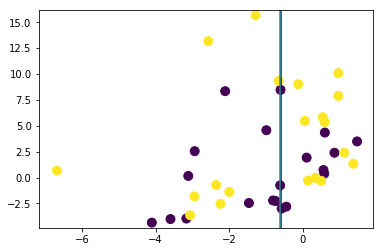

In [5]:
tree = ScratchDecesionTreeClassifier()
tree.fit(X, y)
plot_decision_regions(X, tree)

# 説明

## 決定木とは何か
決定木とは木構造を用いて分類や回帰を行う機械学習の手法の一つである。
分類木と回帰木の総称して決定木という。
### 分類木の例
下図のように、日々の温度と湿度のデータ、および、その日A君が暑いと感じたか暑くないと感じたかのデータが与えられた状況を考えてみる。

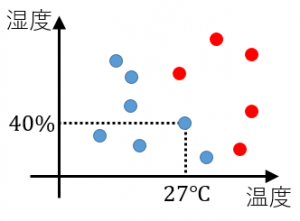

In [6]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/ketteigi1.png"))

図の$１$つの点が$１$日を表します。赤い点はA君が暑いと感じた日、青い点は暑くないと感じた日を表します。例えば、温度が $27$度で湿度が $40％$の日は暑くないと感じている。<br>
このデータから、例えば、下図のような「温度と湿度がどのようなときに暑いと感じるか」を表現したツリーを作ることがでる。<br>
このデータから、例えば、下図のような「温度と湿度がどのようなときに暑いと感じるのか」を表現したツリーを作ることができる。

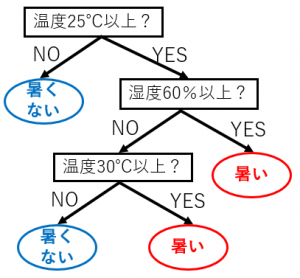

In [7]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/ketteigi2.png"))

このように分類のルールをツリーで表現したものを分類木と言う。

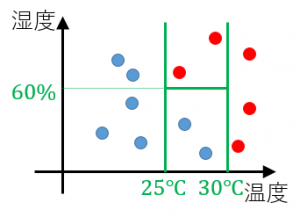

In [8]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/ketteigi3.png"))

この分類木を、もとの入力データの図に境界線を追加して表現することもできる。もとのデータを縦と横に分割して、それぞれの長方形領域で暑いか暑くないかを定めるモデルである。<br>
なお、この例は二値分類であるが、3つ以上のグループの分類問題にも有効なモデルである。

## ロジスティック回帰やSVMとの違い
### ロジスティック回帰
ロジスティック回帰分析では、2つのデータ群は、だいたい分かれますが、集まってはいない。 また、正規分布の仮定がない。</br>
ロジスティック回帰分析は、「だいたい」というのを、確率を使って数値で表現できる。</br>
例えば、ほとんどの領域でＡの発生率が０で、一部の領域で最大で発生率が0.1になるような分布をしている場合、 パターン認識では、判別結果はすべてBになる。 多くの手法は、それ以上はわからないのですが、ロジスティック回帰分析では、低い確率では発生する事を扱える。 

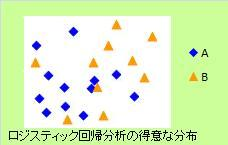

In [9]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/mt3-j.png"))

### ロジスティック回帰
判別分析に適した分布は、サポートベクターマシンにも適してる。 しかも、正規分布していなくても大丈夫。</br>
ロジスティック回帰分析との違いは、片方のデータ群の表れ方が0.5以上の領域がないと、エラーになることである。 

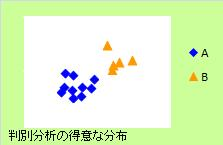

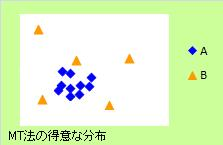

In [11]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/mt1-j.png"))
display_png(Image("/home/hiro/デスクトップ/mt2-j.png"))

### 決定木
決定木は、3つの図のどれに対しても、不適当ということではない。 そういう意味で、データの特徴的な部分をざっくりと見ておきたい時に向いている。
ただ、階層構造を使ってモデルを作るので、階層構造で説明する必要のないデータについては、 上記の2つの手法を使った方が結果の解釈が楽である。 

## ジニ不純度とは何か。例えばどのようなときに最大になるか
決定木アルゴリズムでは、一般的にジニ不純度という指標を使って不純度を算出する。<br>
いま$1$つのノード$t$に注目し、ノード内のトレーニングサンプルが全部で$n$個あり、クラスが全部で$c$個ある状態を考える。<br>
このノード$t$内で、クラス$i$に属するトレーニングサンプルの個数を$n_i$とすると、クラス$i$に属するトレーニングサンプルの割合$p(i|t)$は、
${\displaystyle
p(i|t) = \frac{n_i}{n} \tag{1}
}$
となる。ジニ不純度$IG(t)$は$p(i|t)$を使って以下の式で表される。
${\displaystyle
I_G(t) = 1 - \sum_{i=1}^c {p(i|t)}^2 \tag{2}
}$
絵で描くと下の様に計算している。

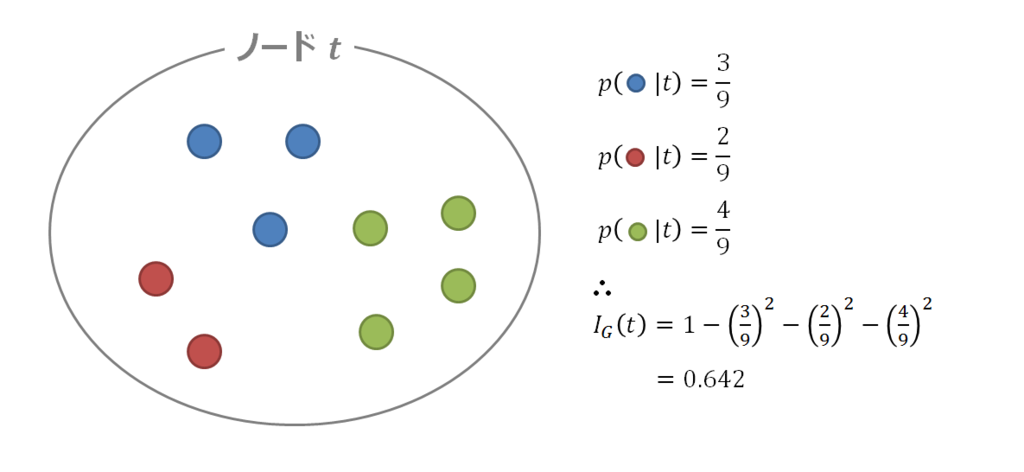

In [12]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/home/hiro/デスクトップ/gi.png"))

最も不純度が低い状態は、ノード$t$に含まれるトレーニングサンプルが全て同じクラスに属する状態で、この時のジニ不純度を計算すると、
${\displaystyle
I_G(t) = 1 - \sum_{i=1}^1 {\left(\frac{n}{n}\right)}^2 =0 \tag{3}
}$
となり、ジニ不純度が最小となる。また、最も不純度が高い状態、つまりトレーニングサンプルが全て異なるクラスに属する状態では、
${\displaystyle
I_G(t) = 1 - \sum_{i=1}^n {\left(\frac{1}{n}\right)}^2 = 1 - \frac{1}{n} \tag{4}
}$
となり、ジニ不純度が最大となる。<br>
ジニ不純度は、ノード内の不純度が高くなるにつれて1に漸近して大きくなる。

## 決定木は情報利得をどのように使うことで学習するか
決定木では、トレーニングサンプルのグループであるノードの分岐を繰り返して行くことで分けていくが、分ける前のノードを親ノード、分けた後のノードを子ノードと言う。<br>
親ノードと子ノードの不純度を計算し、その差分である情報利得が最大になるように子ノードを分けていく。<br>
具体的な例で考える。親ノード$D_p$を$2$つの子ノード$D_left$、$D_right$に分けることを考える。<br>
親ノード内のトレーニングサンプルの個数を$N_p$、子ノード内のトレーニングサンプルの個数をそれぞれ$N_left$、$N_right$、また分割する特徴量を$f$とすると、親ノードから子ノードにトレーニングサンプルを分けたときに得られる情報利得$IG(D_p,f)$は、
$${\displaystyle
IG(D_p,f) = I_G(D_p) - \frac{N_{left}}{N_p} I_G(D_{left}) - \frac{N_{right}}{N_p} I_G(D_{right})  \tag{8}
}$$
となる。情報利得とはその名の通り、親ノードから子ノードへグループを分けたときにそこから得られる情報量という意味である。不純度は情報量と同じ概念として考えることができるのでこう呼ばれている。<br>
情報利得が最大になるということは子ノードの不純度が最小になるということで、つまり子ノード内のクラスの純度が、より高くなるように分けていく。<br>
親ノードを子ノードに分け更にその子ノードに分け、、を繰り返しそれ以上分ける事が出来なくなったノードをリーフと呼ぶ。木の葉っぱということである。<br>
最後までノード分けを実施してしまうと、過学習状態(新しいサンプルデータに対し汎用性のない分類機になってしまう)に陥ってしまうため、実際は最後までノード分けせずにノード分割する回数(ノードの深さ)のMax値を指定したり、ノード分けで次第に小さくなっていく情報利得に閾値を設けて途中で中断するのが一般的ある。<br>
決定木でノードを分けていく方法は色々あるが、実数の特徴量でトレーニングサンプルを上記の様に2分木に分けていく方法はCART法と呼ばれており、scikit-learnの決定木でも採用されている。